# EDA of InstaCart dataset

In [1]:
# Importing all the necessary libraries.
import pandas as pd
from matplotlib import pyplot as plt
import plotly.express as px
import numpy as np

In [2]:
df_orders = pd.read_csv('../sprint_7/instacart_orders.csv', sep= ';')
df_products = pd.read_csv('../sprint_7/products.csv', sep= ';')
df_aisles = pd.read_csv('../sprint_7/aisles.csv', sep= ';')
df_departments = pd.read_csv('../sprint_7/departments.csv', sep= ';')
df_order_products = pd.read_csv('../sprint_7/order_products.csv', sep= ';')

In [3]:
# List of all data frame variables to use in a for loop.
df_list = [df_orders, df_products, df_aisles, df_departments, df_order_products]

# Assigning names of the data frames to variables in order to call in a for loop.
df_orders.name = 'df_orders'
df_products.name = 'df_products'
df_aisles.name = 'df_aisles'
df_departments.name = 'df_departments'
df_order_products.name = 'df_order_products'

In [4]:
# for loop to display first 5 rows, and .info() for each data frame.
for item in df_list:
    print(item.name) 
    display(item.head())
    print (item.info(show_counts=True))
    print('______________________________________________________________')
    print()
    print()

df_orders


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB
None
______________________________________________________________


df_products


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None
______________________________________________________________


df_aisles


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
None
______________________________________________________________


df_departments


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes
None
______________________________________________________________


df_order_products


,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB
None
______________________________________________________________




In [5]:
# Printing the number of missing values in each column.
print('The number of missing values in')
print("df_order['days_since_prior_order']:", df_orders['days_since_prior_order'].isna().sum())
print("df_products['product_name']:", df_products['product_name'].isna().sum())
print("df_order_products['add_to_cart_order']:", df_order_products['add_to_cart_order'].isna().sum())

The number of missing values in
df_order['days_since_prior_order']: 28819
df_products['product_name']: 1258
df_order_products['add_to_cart_order']: 836


### Initial Impressions:
    - All columns are appropriate data type (ID columns are all 'int64')
    - Columns with missing values:
        df_orders['days_since_prior_order']
        df_products['product_name']
        df_order_products['add_to_cart_order']

## Find and remove duplicate values (and describe why you make your choices)

### `df_orders` data frame

In [6]:
# Check for duplicated orders in df_orders.
print()
print('The number of duplicate rows in df_orders:', df_orders.duplicated().sum())
duplicate_df_orders = df_orders[df_orders.duplicated()]
display(duplicate_df_orders.sort_values(by = 'order_id'))


The number of duplicate rows in df_orders: 15


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
371905,391768,57671,19,3,2,10.0
321100,408114,68324,4,3,2,18.0
394347,467134,63189,21,3,2,2.0
145574,794638,50898,24,3,2,2.0
311713,1021560,53767,3,3,2,9.0
273805,1112182,202304,84,3,2,6.0
411408,1286742,183220,48,3,2,4.0
266232,1782114,106752,1,3,2,NaN
230807,1918001,188546,14,3,2,16.0
323900,1919531,191501,32,3,2,7.0


In [7]:
# Check for all orders placed Wednesday at 2:00 AM.
wednesday_orders = df_orders[df_orders['order_dow'] == 3]
wednesday_2am_orders = wednesday_orders[wednesday_orders['order_hour_of_day'] == 2]
print('There were:', wednesday_2am_orders['order_id'].count(), 'total orders placed on Wednesday at 2:00 AM')

There were: 121 total orders placed on Wednesday at 2:00 AM


In [8]:
# Remove duplicate orders.
df_orders = df_orders.drop_duplicates().reset_index()

In [9]:
# Double check for duplicate rows.
print(df_orders.duplicated().sum())

0


In [10]:
# Double check for duplicate order IDs only.
print(df_orders['order_id'].duplicated().sum())

0


15 duplicate rows were found in df_orders data frame, closer inspection revealed all of them were from Wednesday at 2:00 AM.

All duplicate rows were removed and index reset.

### `df_products` data frame

In [11]:
# Check for duplicated orders in df_products.
print()
print('The number of duplicate rows in df_products:', df_products.duplicated().sum())


The number of duplicate rows in df_products: 0


In [12]:
# Check for just duplicate product IDs.
print(df_products['product_id'].duplicated().sum())

0


In [13]:
# Adding column 'product_name_lowercase' by converting 'product_name' column to lowercase.
df_products['product_name_lowercase'] =  df_products['product_name'].str.lower()

# Check for just duplicate product names 
product_name_duplicated = df_products['product_name_lowercase'].duplicated()
print('The total number of duplicate product names:', product_name_duplicated.sum())

The total number of duplicate product names: 1361


In [14]:
# Creating a series object without missing names form 'product_name_lowercase' column.
df_products_not_missing_names = df_products['product_name_lowercase'].dropna()

# Check for duplicate product names that aren't missing.
print("The number of duplicates among names that aren't missing:", df_products_not_missing_names.duplicated().sum(),'.')

The number of duplicates among names that aren't missing: 104 .


Among 1361 duplicate product names found, 104 are from names that aren't missing.

### `df_departments` data frame

In [15]:
# Checking for duplicates in df_departments.
print(df_departments.duplicated().sum(), 'duplicates found in df_departments.')

0 duplicates found in df_departments.


No duplicate rows found in df_departments.

### `df_aisles` data frame

In [16]:
# Checking for duplicates in df_aisles.
print(df_aisles.duplicated().sum(), 'duplicates found in df_aisles.')

0 duplicates found in df_aisles.


No duplicate rows found in df_aisles.

### `df_order_products` data frame

In [17]:
# Check for fullly duplicate rows.
print(df_order_products.duplicated().sum(), 'duplicates found in df_order_products')

0 duplicates found in df_order_products


In [18]:
# Double check for any other tricky duplicates
print("['order_id'].describe()")
print(df_order_products['order_id'].describe())
print()
print("['product_id'].describe()")
print(df_order_products['product_id'].describe())

['order_id'].describe()
count    4.545007e+06
mean     1.711166e+06
std      9.850955e+05
min      4.000000e+00
25%      8.608170e+05
50%      1.711530e+06
75%      2.561311e+06
max      3.421079e+06
Name: order_id, dtype: float64

['product_id'].describe()
count    4.545007e+06
mean     2.558084e+04
std      1.409552e+04
min      1.000000e+00
25%      1.353500e+04
50%      2.527200e+04
75%      3.793500e+04
max      4.969400e+04
Name: product_id, dtype: float64


No duplicate rows found in df_order_products.

## Find and remove missing values


### `df_products` data frame

In [19]:
print("The number of missing vales in 'days_since_prior_order':", df_orders['days_since_prior_order'].isna().sum())
print("The number of missing vales in 'product_name':", df_products['product_name'].isna().sum())
print("The number of missing vales in 'add_to_cart_order':", df_order_products['add_to_cart_order'].isna().sum())

The number of missing vales in 'days_since_prior_order': 28817
The number of missing vales in 'product_name': 1258
The number of missing vales in 'add_to_cart_order': 836


In [20]:
# Are all of the missing product names associated with aisle ID 100?
missing_product_names = df_products[df_products['product_name'].isna()]
print(missing_product_names.groupby('aisle_id')['product_id'].count())

aisle_id
100    1258
Name: product_id, dtype: int64


In [21]:
# Are all of the missing product names associated with department ID 21?
print(missing_product_names.groupby('department_id')['product_id'].count())

department_id
21    1258
Name: product_id, dtype: int64


In [22]:
# What is this aisle and department?
aisle_index = 99
department_index = 20
print('The aisle name is:', df_aisles.loc[aisle_index,'aisle'],'.')
print('The department name is:', df_departments.loc[department_index, 'department'],'.')

The aisle name is: missing .
The department name is: missing .


In [23]:
# Fill missing product names with 'Unknown'
df_products['product_name'] = df_products['product_name'].fillna('Unknown')

In [24]:
# Checking for any remaning missing values.
print("The number of missing vales in 'product_name':", df_products['product_name'].isna().sum())

The number of missing vales in 'product_name': 0


1258 missing 'product_names' were found, all of them had 'aisle_id'=100 and 'department_id'=21. Upon futher investigation, it was revealed both aisle_id 100 and department_id 21 were named "missing".

### `df_orders` data frame

In [25]:
df_not_first_orders = df_orders[df_orders['order_number']!=1]
df_not_first_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 450135 entries, 0 to 478951
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   index                   450135 non-null  int64  
 1   order_id                450135 non-null  int64  
 2   user_id                 450135 non-null  int64  
 3   order_number            450135 non-null  int64  
 4   order_dow               450135 non-null  int64  
 5   order_hour_of_day       450135 non-null  int64  
 6   days_since_prior_order  450135 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 27.5 MB


In [26]:
# Are there any missing values where it's not a customer's first order?
print(df_not_first_orders['days_since_prior_order'].isna().sum(), 'missing values where it is not the customers first order.')

0 missing values where it is not the customers first order.


No values are missing after filtering out first orders from df_orders.

### `df_order_products` data frame

In [27]:
df_order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [28]:
# What are the min and max values in this column?
print("Min. and Max. values in 'add_to_cart_order' column:",
      int(df_order_products['add_to_cart_order'].min()),
      ',',
      int(df_order_products['add_to_cart_order'].max()))

Min. and Max. values in 'add_to_cart_order' column: 1 , 64


In [29]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'
df_order_products_filtered = df_order_products[df_order_products['add_to_cart_order'].isna()]
filtered_order_ids = df_order_products_filtered['order_id'].unique()
print(filtered_order_ids)

[2449164 1968313 2926893 1717990 1959075  844733   61355  936852  264710
 1564093  129627  293169 2849370 1386261 3308010  903110 2136777 3347453
 1888628  165801 2094761 1038146 2997021  813364 2256933  171934 2409109
 1730767 1169835  733526  404157 3125735  747668 1800005 1961723  871281
  388234 1648217 1477139  102236 1021563 1832957 2721963  678116 1220886
 1673227 2999801 1633337 2470674 2625444 1677118 2479011 3383594 1183255
 1713430 2652650 1598369 1916118  854647 1302315  888470  180546 2621907
 1308785 2729254    9310 2170451 2979697 1625713 1529171]


In [30]:
# Do all orders with missing values have more than 64 products?
print(df_order_products.query("order_id in @filtered_order_ids").groupby('order_id')['product_id'].count().sort_values())

order_id
9310        65
747668      65
1598369     65
1677118     65
2170451     65
          ... 
1959075     98
171934     104
2136777    108
3308010    115
61355      127
Name: product_id, Length: 70, dtype: int64


In [31]:
# Replace missing values with 999 and convert column to integer type.
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].fillna(999)
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].astype('int')

# Checking to see if any missing values remain, and confirming change to integer type.
df_order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           4545007 non-null  int64
 1   product_id         4545007 non-null  int64
 2   add_to_cart_order  4545007 non-null  int32
 3   reordered          4545007 non-null  int64
dtypes: int32(1), int64(3)
memory usage: 121.4 MB


836 missing values in the 'add_to_cart_order' column were found, orders with more than 64 items didn't add a value after 64.
missing values were replace with 999.

###  Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [32]:
# Making a list of all unique hours in 'order_hour_of_day' column.
hours_array = df_orders['order_hour_of_day'].unique()
hour_list =[]
for hour in hours_array:
    hour_list.append(hour)

# Sorting and printing the list. We can see all numbers from 0 to 23.
hour_list.sort()
print(hour_list)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [33]:
# Making a list of all unique dows in 'order_of_day' column.
dow_array = df_orders['order_dow'].unique()
dow_list = []
for dow in dow_array:
    dow_list.append(dow)

# Sorting and priting the list. We can see all numbers from 0 to 6.    
dow_list.sort()
print(dow_list)                      

[0, 1, 2, 3, 4, 5, 6]


### What time of day do people shop for groceries?

In [34]:
df_orders_by_hour_of_day = df_orders.groupby('order_hour_of_day')['order_id'].count()
print(df_orders_by_hour_of_day.sort_values(ascending=False))

order_hour_of_day
10    40578
11    40032
15    39789
14    39631
13    39007
16    38112
12    38034
9     35896
17    31930
18    25510
8     25024
19    19547
20    14624
7     13043
21    11019
22     8512
23     5611
6      4215
0      3180
1      1763
5      1371
2       989
3       770
4       765
Name: order_id, dtype: int64


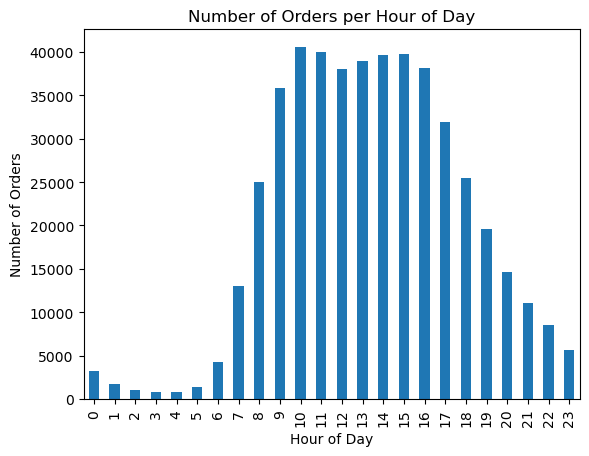

In [35]:
df_orders_by_hour_of_day.plot(kind = 'bar',
                             title ='Number of Orders per Hour of Day',
                             xlabel = 'Hour of Day',
                             ylabel = 'Number of Orders')
plt.show()

10:00 AM to 10:59 AM is when the most number of orders are placed.

### What day of the week do people shop for groceries?

In [36]:
df_orders_dow = df_orders.groupby('order_dow')['order_id'].count()
print(df_orders_dow.sort_values(ascending=False))

order_dow
0    84090
1    82185
2    65833
5    63488
6    62649
3    60897
4    59810
Name: order_id, dtype: int64


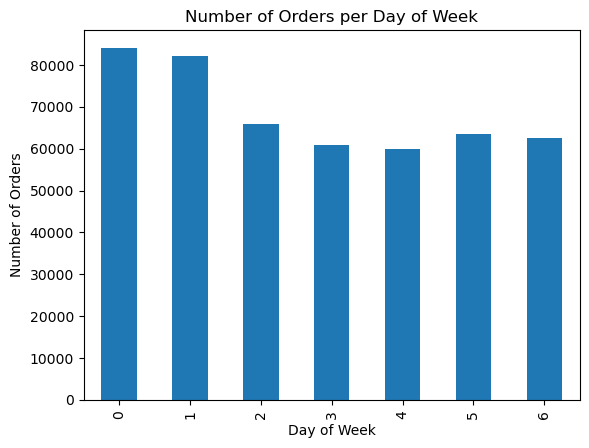

In [37]:
df_orders_dow.plot(kind = 'bar',
                  title = 'Number of Orders per Day of Week',
                  xlabel = 'Day of Week',
                  ylabel = 'Number of Orders')
plt.show()

Sunday is the busiest day for grocery shopping.

### How long do people wait until placing another order?

In [38]:
# Using the df_not_first_orders that was created eariler.
# It filters out the firt orders, which are not relavent to our analysis 
print('On average customers wait',
      round(df_not_first_orders['days_since_prior_order'].mean(),1),
      'days before placing another order.')

On average customers wait 11.1 days before placing another order.


In [39]:
df_not_first_orders_filtered = df_not_first_orders.groupby('days_since_prior_order')['order_id'].count()

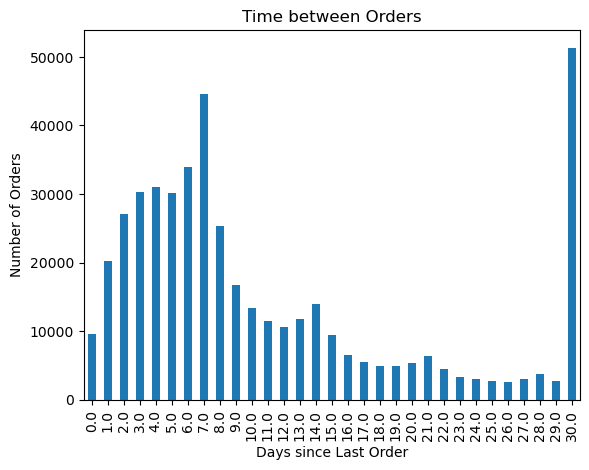

In [40]:
df_not_first_orders_filtered.plot( kind = 'bar',
                        title = 'Time between Orders',
                        xlabel = 'Days since Last Order',
                        ylabel = 'Number of Orders')
plt.show()

11.1 days is the average time between orders. 

30 days being the median and the maximum value. It is possible that 30 days was the max value set during data collection.
7 and 14 days also show peaks, which could indicate recurring order of some kind.

0 is the smallest value, a certain number of customers placed orders in less than a day before the last one.

### Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays?

In [41]:
# Assigning variables by filtering the desired dow.
df_orders_wednesday = df_orders[df_orders['order_dow']==3]
df_orders_saturday = df_orders[df_orders['order_dow']==6]

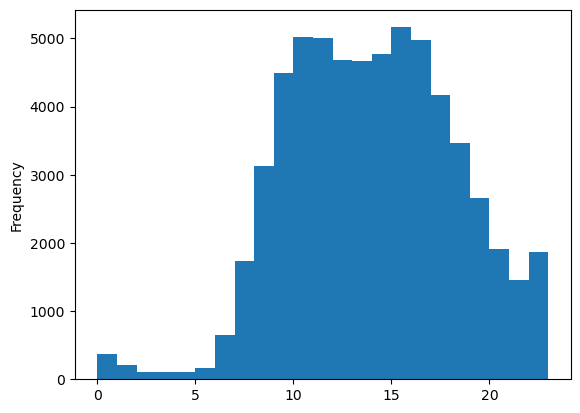

In [42]:
df_orders_wednesday['order_hour_of_day'].plot(kind = 'hist',
                                              bins=23)
plt.show()

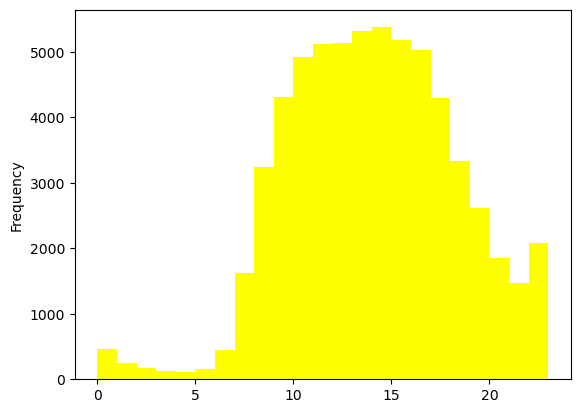

In [43]:
df_orders_saturday['order_hour_of_day'].plot(kind = 'hist', color='yellow',
                                             bins=23)
plt.show()

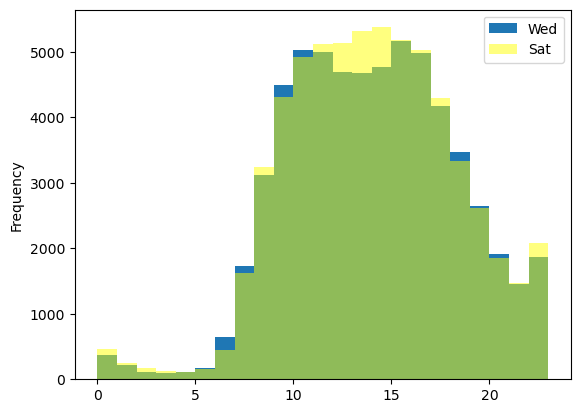

In [44]:
df_orders_wednesday['order_hour_of_day'].plot(kind = 'hist',
                                              bins=23)
df_orders_saturday['order_hour_of_day'].plot(kind = 'hist',
                                             color ='yellow',
                                             alpha =.5,
                                             bins=23)

plt.legend(['Wed','Sat'])
plt.show()

Saturday peaks around 01:00 PM to 03:00PM, whereas Wednesday has a bimodal peak around 10:00 AM and 07:00 PM.

### What's the distribution for the number of orders per customer?

In [45]:
# Creating a seires object that groups by 'order_number' and applys a count to the user_id column.
df_users_filtered = df_orders.groupby('order_number')['user_id'].count()

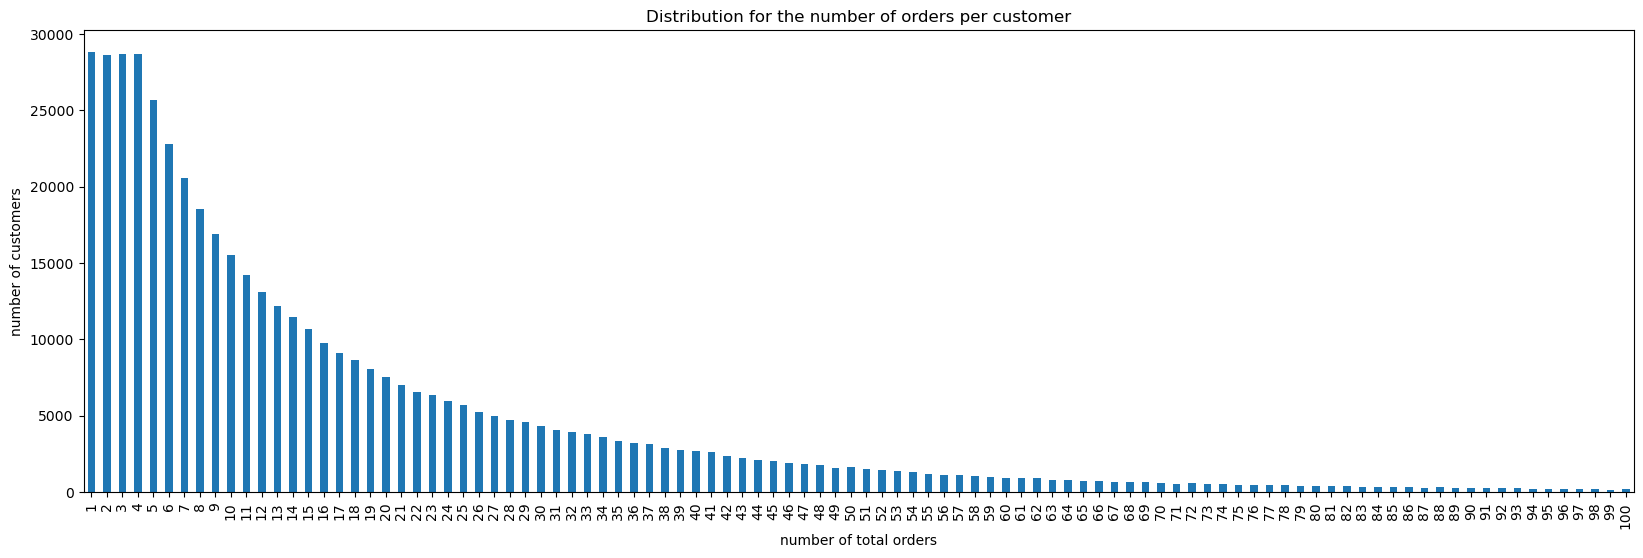

In [46]:
df_users_filtered.plot(kind = 'bar',
                       title ='Distribution for the number of orders per customer',
                       xlabel = 'number of total orders',
                       ylabel ='number of customers',
                       figsize=[20,6])
plt.show()

We can observe an inverse logarithmic relationship between number of orders and number of customers. i.e. few customer have large total number of orders. 

The number of customers seems to drop logarithmicly after 4 total orders.

### What are the top 20 popular products (display their id and name)?

In [47]:
# Creating a seires object from df_order_products that groups product_id and applys a count to order_id column.
product_counts = df_order_products.groupby('product_id')['order_id'].count().sort_values(ascending = False)

In [48]:
# Merging the product_counts series object to df_products to add product name.
popular_products = pd.merge(product_counts, df_products, on = 'product_id')

In [49]:
# display only the product_id, product_name and 'order_id'(total orders) columns, for the top 20.
display(popular_products[['product_id', 'product_name', 'order_id']].head(20))

,product_id,product_name,order_id
0,24852,Banana,66050
1,13176,Bag of Organic Bananas,53297
2,21137,Organic Strawberries,37039
3,21903,Organic Baby Spinach,33971
4,47209,Organic Hass Avocado,29773
5,47766,Organic Avocado,24689
6,47626,Large Lemon,21495
7,16797,Strawberries,20018
8,26209,Limes,19690
9,27845,Organic Whole Milk,19600


Bananas are among the top 2 most popular products.

Over all fruits and vegetables are very popular.

All of the top 20 are perishable household staples.

###  What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [50]:
# Creating a data frame to include only prodcuts that have been reordered.
df_reordered_products = df_order_products[df_order_products['reordered'] == 1]

In [51]:
# Grouping by product_id and applying the count to order_id, to get a count of how many orders per product_id.
reordered_products_filtered = df_reordered_products.groupby('product_id')['order_id'].count().sort_values(ascending = False)

In [52]:
# Merging with df_prodcuts to add product names to the data frame
popular_reordered_products = pd.merge(reordered_products_filtered, df_products, on = 'product_id')

In [53]:
# Display only the product_id, product_name and 'order_id'(total orders) columns, for the top 20.
display(popular_reordered_products[['product_id', 'product_name', 'order_id']].head(20))

,product_id,product_name,order_id
0,24852,Banana,55763
1,13176,Bag of Organic Bananas,44450
2,21137,Organic Strawberries,28639
3,21903,Organic Baby Spinach,26233
4,47209,Organic Hass Avocado,23629
5,47766,Organic Avocado,18743
6,27845,Organic Whole Milk,16251
7,47626,Large Lemon,15044
8,27966,Organic Raspberries,14748
9,16797,Strawberries,13945


### What are the top 20 items that people put in their carts first? 

In [54]:
# Creating a data frame to include only products that were first item in a cart.
df_first_item = df_order_products[df_order_products['add_to_cart_order'] == 1]

In [55]:
# Grouping by 'product_id' and applying a count to order_id to get a count of how many order per prodcut_id.
df_first_item_filtered = df_first_item.groupby('product_id')['order_id'].count().sort_values(ascending=False)

In [56]:
# Merging with df_prodcuts to add the product names to the data frame.
df_popular_first_item = pd.merge(df_first_item_filtered, df_products, on = 'product_id')

In [57]:
# Display only the product_id, product_name and 'order_id'(total orders) columns, for the top 20.
display(df_popular_first_item[['product_id', 'product_name', 'order_id']].head(20))

,product_id,product_name,order_id
0,24852,Banana,15562
1,13176,Bag of Organic Bananas,11026
2,27845,Organic Whole Milk,4363
3,21137,Organic Strawberries,3946
4,47209,Organic Hass Avocado,3390
5,21903,Organic Baby Spinach,3336
6,47766,Organic Avocado,3044
7,19660,Spring Water,2336
8,16797,Strawberries,2308
9,27966,Organic Raspberries,2024


## Conculsions:

Bananas are among the top 2 most popular products.

Over all fruits and vegetables are very popular.

Most of the top 20 are perishable household staples.

However, 3 non perishable items have made the list: spring water, Saprkling Water, Grapefruit Soda.